In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt

In [4]:
"""fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape, x_test.shape)
"""

'fashion_mnist = tf.keras.datasets.fashion_mnist\n\n(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()\n\nx_train = x_train / 255\nx_test = x_test / 255\n\nprint(x_train.shape, x_test.shape)\n'

In [ ]:
latent_dim = 64
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
    
        #encoder
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        
        #decoder
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28,28))
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
               validation_data=(x_test, x_test))

In [5]:
encoded_img = autoencoder.encoder(x_test).numpy()
decoded_img = autoencoder.decoder(encoded_img).numpy()


NameError: name 'autoencoder' is not defined

NameError: name 'x_test' is not defined

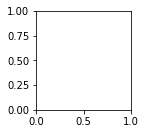

In [6]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    
    # display original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed image
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_img[i])
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
